# Homework 8 (20 points)

name: Ying Jiang

email: jiangyyy@umich.edu

This homework assignment took me 10 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Collaboration Disclosure

In the cell below, please list *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. 

If you did not discuss the homework with anyone else, write __"I did not discuss this homework with anyone."__

Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).)

I did not discuss this homework with anyone. 

## Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

## Nbgrader

We will be using `nbgrader` to grade your jupyter notebook. Additional tests will be used at grading time, you are encouraged to read the problem carefully and verify your code covers all appropriate cases.

**Be careful:** If a jupyter notebook cell takes longer than `120s` to run, the autograder will not grade it and you will receive zero credit for that question.

## Error checking

You do not need to do error checking (raising errors, etc.) in your code unless we explicitly ask you to so in a problem.

## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length 99

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

### Problem 1: Implementing a Basic Data Structure (12 points)
1. A trie (rhymes with tree, confusingly) is a tree-like data structure for storing collections of array-like data. We will confine our attention to strings for the sake of this problem, but bear in mind that tries can of course be used to represent much more general data than that. 

   In a trie, each path from the root node to a leaf corresponds to a string in the collection, and every string in the collection has a corresponding path from the root to a node (not necessarily a leaf). Each edge from a node to one of its children is annotated with a letter, as in this example, which represents the collection of strings {cat, car, cog, dart, do, dog}. Notice that only certain nodes in the trie are shaded. These correspond precisely to the nodes that represent strings in the collection. In passing, note that tries have certain advantages and disadvantages when compared against other look-up structures like hash tables. Refer to any textbook on data structures (or Wikipedia) for a discussion. 
   
   It should be more or less clear how one might represent this data structure as a Python dictionary, but let’s walk through it. We will represent a trie by a series of nested dictionaries, with each node in the trie having a dictionary that maps a single character to another dictionary. Thus, for example, the trie in the figure above is, at its outer-most layer, a dictionary, say, `my_trie`, with two keys, ’c’,’d’. `my_trie[’c’]` is itself a dictionary with two keys, ’a’,’o’ and `my_trie[’d’]` is a separate dictionary with the same two keys. (that is, `my_trie[’c’]` and `my_trie[’d’]` are equivalent, but they are not identical). Note that one tricky thing here is to make sure we have a system for representing which leaves (i.e., dictionaries) correspond to the ends of strings (i.e., shaded nodes in the figure above). To solve this, we will use the empty string (’’) as a sort of special “end-of-word” character. Thus, for example, `my_trie[’d’][’o’]` would itself be a dictionary with the keys ’’,’g’. The first key corresponds to the fact that ’do’ is a string in the collection, while the second corresponds to the string ’dog’ (which also happens to be in the collection, so that the dictionary `my_trie[’d’][’o’][’g’]` will have the empty string as its only key. We will, by convention, give the end-character symbol ’’ the value None (note that this is again an arbitrary choice, but one which I am enforcing for the sake of uniformity and ease of grading). 
   
   Now, this is all well and good, but the natural (and more principled) thing to do is to wrap this structure in a class. Define a class called a `Trie`, which supports the following methods:

 - __ __init____(self) : takes no arguments. Initializes an empty dictionary called root as the only instance attribute of the Trie object. This dictionary will serve as the data structure described in the previous paragraph.
 - __add__(self,s) : takes a string s as its only argument. Adds s to the trie represented by self.root according to the procedure described in the paragraph above.
 - __contains__(self,s) : takes a string s as its only argument and returns a boolean, which is True if and only if the string s is represented in the trie.
 - __ __repr____(self) : takes no arguments. Returns a string representing the object. When you try to print an object, Python calls this method (if it exists). See https://docs.python.org/3.6/reference/datamodel.html#object.__repr__ for more information. In our case, let’s just say that calling the Trie.__repr__ method just returns the string representation of the dictionary, which you’ll recall is stored as self.root.
 
   You are of course free to implement methods additional to these if you wish. Hint: you may find it helpful to write a “helper” method for use in the contains method, that takes a string and a dictionary as its two arguments, say, `contains_helper(s,d)`. If the first character of the string is not in the dictionary, you can safely return False. If the first character is in the dictionary, we can recurse, contains_helper(s[1:],d[s[0]]). Be careful of the base case, where s is the empty string! A similar trick will also help with the add method.

In [3]:
class Trie:
    def __init__(self):
        self.root = dict()

    def add(self, s):
        # judge whether s in trie or not
        self.add_helper(s, self.root)

    def add_helper(self, s, d):
        if s == '':
            d[s] = None
        else:
            if s[0] not in d.keys():
                d[s[0]] = dict()
            self.add_helper(s[1:], d[s[0]])

    def contains_helper(self, s, d):
        if s == '':
            if s in d.keys():
                return True
            else:
                return False
        else:
            if s[0] in d.keys():
                return self.contains_helper(s[1:], d[s[0]])
            else:
                return False

    def contains(self, s):
        d = self.root
        return self.contains_helper(s, d)

    def __repr__(self):
        return str(self.root)

2. Write a function called `wordlist2trie` that takes a list of strings as input and returns a Trie object representing the collection of strings in the input list. Your function should perform error checking to verify that the input is indeed a list and that all its elements are strings. Note that we could just as well have implemented a method in the Trie class to do this, if we wanted.

In [4]:
def wordlist2trie(wlist):
    # error checking
    if not isinstance(wlist, list):
        raise TypeError
    if not all(isinstance(s, str) for s in wlist):
        raise ValueError

    a = Trie()
    for s in wlist:
        a.add(s)
    return a

In [6]:
test = Trie()
assert test.root == {}

In [7]:
T = wordlist2trie(['dog', 'do'])
assert not T.contains('cat')
assert T.contains('dog')

In [8]:
assert type(T.__repr__()) == str

In [9]:
T = wordlist2trie(['dog', 'do'])
T.add('cat')
assert T.contains('cat')
assert T.contains('dog')

In [10]:
complex_trie = wordlist2trie(["stats", "statistics", "stat", "statistic", "mean", "median", "mode", ""])
assert complex_trie.contains("")
assert complex_trie.contains("stat")

1:100: E501 line too long (104 > 99 characters)


In [11]:
empty_trie = wordlist2trie([])
assert type(empty_trie) == Trie

In [12]:
T = wordlist2trie(['dog', 'do'])
assert T.__repr__() == "{'d': {'o': {'g': {'': None}, '': None}}}"

In [13]:
complex_trie = wordlist2trie(["stats", "statistics", "stat", "statistic", "mean", "median", "mode", ""])
complex_trie.add("mean")
assert complex_trie.contains("mean")

1:100: E501 line too long (104 > 99 characters)


3. Download the word list from http://www.greenteapress.com/thinkpython/code/words.txt (or read it directly using urlib or requests), and use `wordlist2trie` to build a trie representing the words in the word list. Save the result in a variable called `big_trie`.

In [14]:
import urllib.request
f = urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt")
a = f.read()
a = str(a).strip('b\'')
wlist = [i for i in a.split('\\r\\n')[:-1]]
big_trie = wordlist2trie(wlist)

In [15]:
assert type(big_trie) == Trie

In [16]:
assert big_trie.contains('suspicious')

In [17]:
assert not big_trie.contains(" ")

In [18]:
assert big_trie.contains("big")

### Problem 2: Comparing Sorting Algorithms (8 points)

A point that we touched upon in lecture is the distinction between worst-case and averagecase run time. That is, an algorithm may require, say, $O(n)$ time to run on most inputs, but certain inputs require, say, $O(n^2)$ time. In this problem, you’ll see an illustration of this phenomenon in the context of sorting algorithms.
1. <b>(3 points)</b> We are going to compare the performance of three popular sorting algorithms: merge sort, quicksort and bubble sort. Their respective Wikipedia pages, each of which includes pseudocode, which you are free to consult. Some of these pages display pseudocode for multiple variants of the algorithms (e.g., implementing certain small optimizations). You are not required to implement any of these speedups, but you are welcome to do so if you wish. You are free, if you wish, to simply copy the implementation of quicksort from the lecture slides. Note: looking up solutions to this problem from any resource other than these Wikipedia pages and the course materials will be considered academic misconduct and will be referred to Rackham’s academic integrity office accordingly.
 - https://en.wikipedia.org/wiki/Merge_sort
 - https://en.wikipedia.org/wiki/Quicksort
 - https://en.wikipedia.org/wiki/Bubble_sort
   
   Implement functions called `mergesort`, `quicksort` and `bubblesort`, each of which takes as input a list of numbers (ints and/or floats) and returns the list with elements sorts in non-decreasing order. Your sorting functions should perform error checking to ensure that the input is a list and that the elements of the list are all numeric (i.e., ints and/or floats). Your quicksort should use the last element of the input list as the pivot.

In [19]:
def quicksort(t):
    # error checking
    if not isinstance(t, list):
        raise TypeError
    if not all(isinstance(i, (int, float)) for i in t):
        raise ValueError
    # use the lecture codes
    if len(t) <= 1:
        return t
    (less, mid, more) = ([], [], [])
    pivot = t[0]
    mid.append(t[0])
    for i in range(1, len(t)):
        if t[i] == pivot:
            mid.append(t[i])
        elif t[i] < pivot:
            less.append(t[i])
        else:
            more.append(t[i])
    return quicksort(less) + mid + quicksort(more)

In [20]:
def mergesort(t):
    # error checking
    if not isinstance(t, list):
        raise TypeError
    if not all(isinstance(i, (int, float)) for i in t):
        raise ValueError

    if len(t) <= 1:
        return t
    mid = int(len(t)/2)
    left = mergesort(t[:mid])
    right = mergesort(t[mid:])

    result = []
    while len(left) >= 1 and len(right) >= 1:
        if left[0] <= right[0]:
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]
    if len(left) >= 1:
        result += left
    if len(right) >= 1:
        result += right
    return result

In [21]:
def bubblesort(t):
    # error checking
    if not isinstance(t, list):
        raise TypeError
    if not all(isinstance(i, (int, float)) for i in t):
        raise ValueError
    n = len(t)
    swapped = True
    while swapped:
        swapped = False
        for i in range(n-1):
            if t[i] > t[i+1]:
                t[i], t[i+1] = t[i+1], t[i]
                swapped = True
    return t

In [22]:
assert quicksort([1, 2, 3, 4]) == [1, 2, 3, 4]
assert quicksort([6]) == [6]

In [23]:
assert quicksort([]) == []

In [24]:
assert bubblesort([1, 2, 3, 4]) == [1, 2, 3, 4]

In [25]:
assert bubblesort([6]) == [6]

In [26]:
assert mergesort([1, 2, 3, 4]) == [1, 2, 3, 4]

In [27]:
assert mergesort([6]) == [6]

2. <b>(2 points)</b> The Wikipedia page on sorting algorithms includes information about best-, average- and worst-case runtimes for a number of sorting algorithms: https://en.wikipedia.org/wiki/Sorting_algorithm#Comparison_of_algorithms. Note that our three algorithms differ in some of these. For example, merge sort and quicksort both have $O(n log n)$ average-case runtime, while bubble sort is $O(n^2)$ runtime in both the average and worst case. Write a function called `run_timing_expt`, which takes a list of numbers (ints and/or floats) as its only input. Calling this function should run each of the three sorting algorithms implemented in the previous subproblem on the given list, timing each call. The function should return a tuple of floats `(t_merge, t_quick, t_bubble)` corresponding to the times that it took to sort the input list with merge sort, quicksort and bubble sort, respectively.

In [28]:
import time


def run_timing_expt(t):
    # error checking
    if not isinstance(t, list):
        raise TypeError
    if not all(isinstance(i, (int, float)) for i in t):
        raise ValueError

    t1 = time.time()
    mergesort(t)
    t_merge = time.time()-t1
    # Runtime for quicksort
    t2 = time.time()
    quicksort(t)
    t_quick = time.time()-t2
    # Runtime for bubblesort
    t3 = time.time()
    bubblesort(t)
    t_bubble = time.time()-t3
    timesort = (t_merge, t_quick, t_bubble)

    return timesort

3. <b>(1 point)</b> Now, we will use the functions defined in the previous two subproblems to explore the behavior of these three sorting algorithms on different kinds of input lists. First, let’s see what happens when we pass an already-sorted list. For $n = 500, 1000, 1500, 2000, 2500$, call `run_timing_expt(list(range(n)))` 20 times. Make a plot that shows the average runtime of the three sorting algorithms as a function of the input size n. Please include error bars in your plot indicating 2 standard errors of the mean. Please store the means in the variables `mean500`, `mean1000`, `mean1500`, `mean2000`, `mean2500`, and your standard deviations (1 sd) in the variables `sd500`, `sd1000`, `sd1500`, `sd2000`, `sd2500`. Using the square root of `np.var` is acceptable for this question. Note that if you call quicksort on an already-sorted list of size much larger than 2500 you will encounter a recursion depth error (assuming that you are running with the default maximum recursion depth of 5000). Why is this the case? Under more realistic conditions, this would cause quicksort to be slow. In this case, it simply causes quicksort to be unusable for even moderately large inputs.

   Please store your mean values 

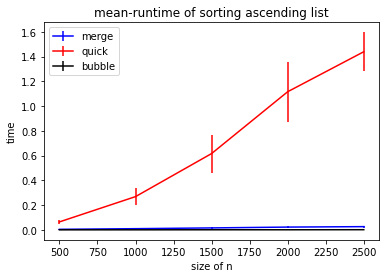

In [29]:
nlist = [500, 1000, 1500, 2000, 2500]
ntime = np.zeros((3, 20))
tmean = np.zeros((3, 5))
tsd = np.zeros((3, 5))
for i in range(len(nlist)):
    for k in range(20):
        ntime[:, k] = np.array(list(run_timing_expt(list(range(nlist[i])))))
    tmean[:, i] = ntime.mean(axis=1)
    tsd[:, i] = ntime.std(axis=1)

# make plot
tsd2 = 2 * tsd
plt.errorbar(nlist, tmean[0, :], color='blue', yerr=tsd2[0, :], label='merge')
plt.errorbar(nlist, tmean[1, :], color='red', yerr=tsd2[1, :], label='quick')
plt.errorbar(nlist, tmean[2, :], color='black', yerr=tsd2[2, :], label='bubble')
plt.xlabel('size of n')
plt.ylabel('time')
plt.title('mean-runtime of sorting ascending list')
plt.legend(loc='upper left')

# set variable
[mean500, mean1000, mean1500, mean2000, mean2500] = [tuple(tmean[:, i])
                                                     for i in range(tmean.shape[1])]
[sd500, sd1000, sd1500, sd2000, sd2500] = [tuple(tsd[:, i]) for i in range(tsd.shape[1])]

In [30]:
assert True

4. <b>(1 point)</b> Run the same experiment, but this time with the input being a list sorted in descending order. That is, you should run 20 trials of `run_timing_expt(sorted(list(range(n)), reverse=True))` for $n = 500, 1000, 1500, 2000, 2500$. Again make a plot summarizing the results and including an appropriate title and axis labels. Please include error bars in your plot indicating 2 standard errors of the mean. Please store the means in the variables `mean500rev`, `mean1000rev`, `mean1500rev`, `mean2000rev`, `mean2500rev`, and your standard deviations (1 sd) in the variables `sd500rev`, `sd1000rev`, `sd1500rev`, `sd2000rev`, `sd2500rev`.

In [ ]:
nlist = [500, 1000, 1500, 2000, 2500]
ntime = np.zeros((3, 20))
tmean = np.zeros((3, 5))
tsd = np.zeros((3, 5))
for i in range(len(nlist)):
    for k in range(20):
        ntime[:, k] = np.array(list(run_timing_expt(sorted(list(range(nlist[i])),
                                                           reverse=True))))
    tmean[:, i] = ntime.mean(axis=1)
    tsd[:, i] = ntime.std(axis=1)

# make plot
tsd2 = 2 * tsd
plt.errorbar(nlist, tmean[0, :], color='blue', yerr=tsd2[0, :], label='merge')
plt.errorbar(nlist, tmean[1, :], color='red', yerr=tsd2[1, :], label='quick')
plt.errorbar(nlist, tmean[2, :], color='black', yerr=tsd2[2, :], label='bubble')
plt.xlabel('size of n')
plt.ylabel('time')
plt.title('mean-runtime of sorting descending list')
plt.legend(loc='upper left')

# set variable
[mean500rev, mean1000rev, mean1500rev, mean2000rev, mean2500rev] = \
  [tuple(tmean[:, i])for i in range(tmean.shape[1])]
[sd500rev, sd1000rev, sd1500rev, sd2000rev, sd2500rev] = \
  [tuple(tsd[:, i]) for i in range(tsd.shape[1])]

In [ ]:
assert True

5. <b>(1 point)</b> Run the same experiment, but this time on random inputs. That is, for each value of n in the previous subproblem, run 20 independent trials of `run_timing_expt([random.random() for _ in range(n)])`. Again make a plot summarizing the results and including an appropriate title and axis labels. Please include error bars in your plot indicating 2 standard errors of the mean. Please store the means in the variables `mean500rand`, `mean1000rand`, `mean1500rand`, `mean2000rand`, `mean2500rand`, and your standard deviations (1 sd) in the variables `sd500rand`, `sd1000rand`, `sd1500rand`, `sd2000rand`, `sd2500rand`.

In [ ]:
nlist = [500, 1000, 1500, 2000, 2500]
ntime = np.zeros((3, 20))
tmean = np.zeros((3, 5))
tsd = np.zeros((3, 5))
for i in range(len(nlist)):
    for k in range(20):
        ntime[:, k] = np.array(list(run_timing_expt([random.random()
                                                     for _ in range(nlist[i])])))
    tmean[:, i] = ntime.mean(axis=1)
    tsd[:, i] = ntime.std(axis=1)

# make plot
tsd2 = 2 * tsd
plt.errorbar(nlist, tmean[0, :], color='blue', yerr=tsd2[0, :], label='merge')
plt.errorbar(nlist, tmean[1, :], color='red', yerr=tsd2[1, :], label='quick')
plt.errorbar(nlist, tmean[2, :], color='black', yerr=tsd2[2, :], label='bubble')
plt.xlabel('size of n')
plt.ylabel('time')
plt.title('mean-runtime of sorting random list')
plt.legend(loc='upper left')

# set variable
[mean500rand, mean1000rand, mean1500rand, mean2000rand, mean2500rand] = \
  [tuple(tmean[:, i])for i in range(tmean.shape[1])]
[sd500rand, sd1000rand, sd1500rand, sd2000rand, sd2500rand] = \
  [tuple(tsd[:, i]) for i in range(tsd.shape[1])]

In [ ]:
assert True

In [5]:
15/32*(1/2)-15/10*(1/2)**5-5/32*(1/4)-15/10*(1/4 )**5+15/2*(1/3*(1/4)**3 -(1/5)*(1/4)**5   )

0.1845703125